# AMI Postprocessing

This example demonstrates advanced postprocessing of AMI simulations.

Keywords: **Circuit**, **AMI**.

## Perform imports and define constants

Perform required imports.

> **Note:** [Numpy](https://numpy.org/)
> and [Matplotlib](https://matplotlib.org/) are required to run this example.

In [1]:
import os
import tempfile
import time

import ansys.aedt.core
from ansys.aedt.core.examples.downloads import download_file
import numpy as np
from matplotlib import pyplot as plt

Define constants.

In [2]:
AEDT_VERSION = "2025.2"
NG_MODE = False  # Open AEDT UI when it is launched.

## Create temporary directory and download example files

Create a temporary directory where downloaded data or
dumped data can be stored.
If you'd like to retrieve the project data for subsequent use,
the temporary folder name is given by ``temp_folder.name``.

In [3]:
temp_folder = tempfile.TemporaryDirectory(suffix=".ansys")

## Download example data

The ``download_file()`` method retrieves example
data from the PyAnsys
[example-data](https://github.com/ansys/example-data/tree/master/pyaedt) repository.

- The fist argument is the folder name where
  the example files are located in the GitHub repository.
- The 2nd argument is the file to retrieve.
- The 3rd argument is the destination folder.

Files are placed in the destination folder.

In [4]:
project_path = download_file(
    "ami", name="ami_usb.aedtz", local_path=temp_folder.name
)

## Launch AEDT with Circuit and enable Pandas as the output format

All outputs obtained with the `get_solution_data()` method are in the
[Pandas](https://pandas.pydata.org/docs/user_guide/index.html) format.
Launch AEDT with Circuit. The `ansys.aedt.core.Desktop` class initializes AEDT
and starts the specified version in the specified mode.

In [5]:
ansys.aedt.core.settings.enable_pandas_output = True
circuit = ansys.aedt.core.Circuit(
    project=os.path.join(project_path),
    non_graphical=NG_MODE,
    version=AEDT_VERSION,
    new_desktop=True,
)

PyAEDT INFO: Python version 3.10.11 (tags/v3.10.11:7d4cc5a, Apr  5 2023, 00:38:17) [MSC v.1929 64 bit (AMD64)].


PyAEDT INFO: PyAEDT version 0.25.dev0.


PyAEDT INFO: Initializing new Desktop session.


PyAEDT INFO: Log on console is enabled.


PyAEDT INFO: Log on file C:\Users\ansys\AppData\Local\Temp\pyaedt_ansys_a6037d09-e4a7-4b32-ad7d-a5019b673ab1.log is enabled.


PyAEDT INFO: Log on AEDT is disabled.


PyAEDT INFO: Starting new AEDT gRPC session.


PyAEDT INFO: AEDT installation Path C:\Program Files\ANSYS Inc\v252\AnsysEM


PyAEDT INFO: Client application successfully started.


PyAEDT INFO: New AEDT gRPC session session started on port 50051.


PyAEDT INFO: 2025.2 version started with process ID 2636.


PyAEDT WARNING: Service Pack is not detected. PyAEDT is currently connecting in Insecure Mode.


PyAEDT WARNING: Please download and install latest Service Pack to use connect to AEDT in Secure Mode.


PyAEDT INFO: Debug logger is disabled. PyAEDT methods will not be logged.


PyAEDT INFO: Archive ami_usb has been restored to project ami_usb


PyAEDT INFO: Active Design set to 0;Circuit1


PyAEDT INFO: Active Design set to 0;Circuit1


PyAEDT INFO: Aedt Objects correctly read


## Solve AMI setup

Solve the transient setup.

In [6]:
circuit.analyze()

PyAEDT INFO: Project ami_usb Saved correctly


PyAEDT INFO: Solving all design setups. Analysis started...


PyAEDT INFO: Design setup None solved correctly in 0.0h 0.0m 24.0s


True

## Get AMI report

Get AMI report data.

In [7]:
plot_name = "WaveAfterProbe<b_input_43.int_ami_rx>"
circuit.solution_type = "NexximAMI"
original_data = circuit.post.get_solution_data(
    expressions=plot_name,
    setup_sweep_name="AMIAnalysis",
    domain="Time",
    variations=circuit.available_variations.nominal,
)
original_data_value = original_data.full_matrix_real_imag[0]
original_data_sweep = original_data.primary_sweep_values
print(original_data_value)

PyAEDT INFO: Post class has been initialized! Elapsed time: 0m 0sec


PyAEDT INFO: Parsing C:\Users\ansys\AppData\Local\Temp\tmpa5njgjeq.ansys\ami\ami_usb.aedt.


PyAEDT INFO: File C:\Users\ansys\AppData\Local\Temp\tmpa5njgjeq.ansys\ami\ami_usb.aedt correctly loaded. Elapsed time: 0m 0sec


PyAEDT INFO: aedt file load time 0.1436481475830078


PyAEDT INFO: Solution Data Correctly Loaded.


Time to initialize solution data:0.0316469669342041
Time to initialize solution data:0.12679195404052734
{'WaveAfterProbe<b_input_43.int_ami_rx>': array([[ 0.00000000e+00, -5.53298382e+02],
       [ 3.12500000e-03, -5.53298382e+02],
       [ 6.25000000e-03, -5.53298382e+02],
       ...,
       [ 9.99906250e+01,  6.02689845e+01],
       [ 9.99937500e+01,  9.83483528e+01],
       [ 9.99968750e+01,  1.33328724e+02]], shape=(32000, 2))}


## Plot data

Create a plot based on solution data.

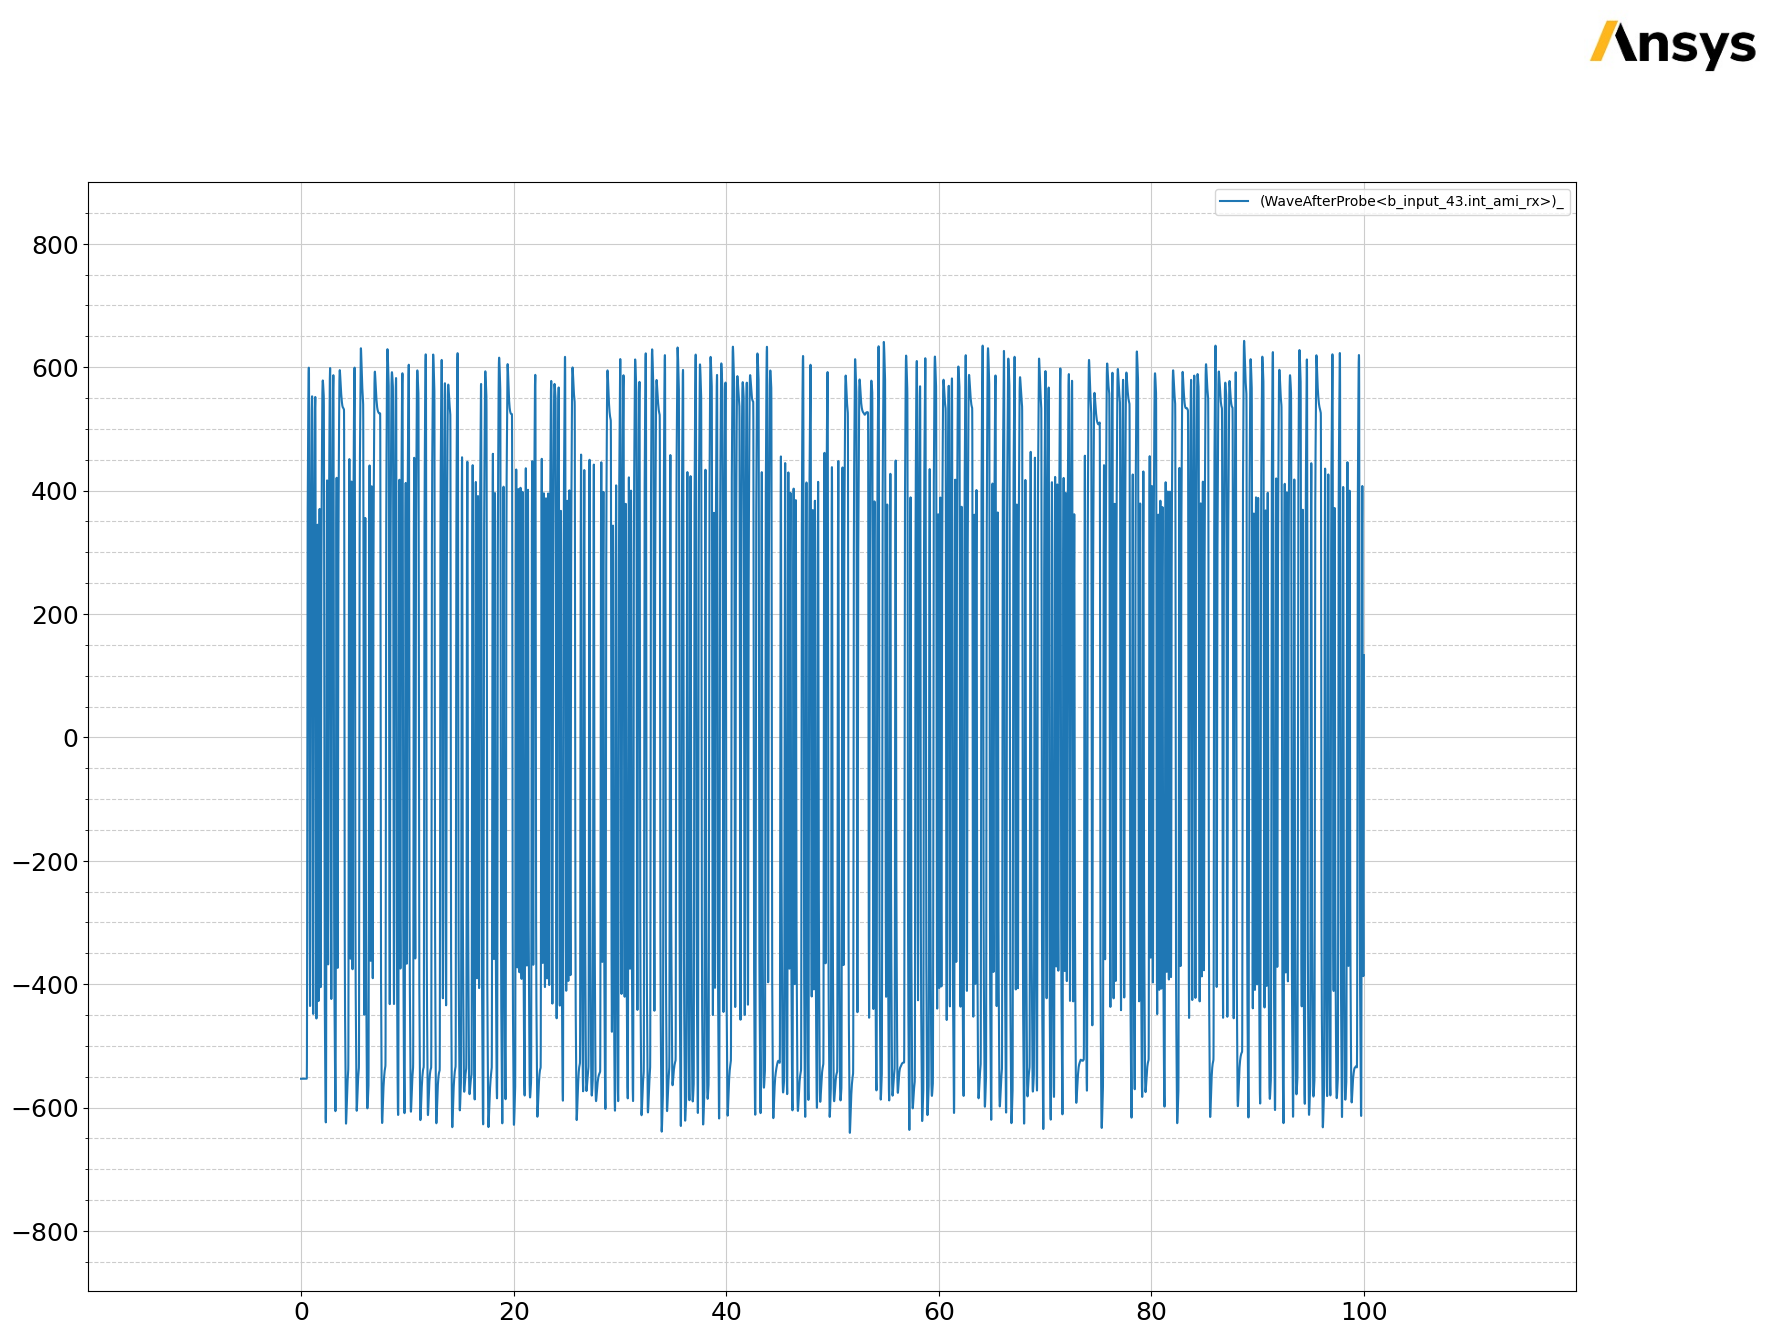

In [8]:
fig = original_data.plot()

## Extract wave form

Use the ``WaveAfterProbe`` plot type to extract the
waveform using an AMI receiver clock probe.
The signal is extracted at a specific clock
flank with additional half unit interval.

In [9]:
probe_name = "b_input_43"
source_name = "b_output4_42"
plot_type = "WaveAfterProbe"
setup_name = "AMIAnalysis"
ignore_bits = 100
unit_interval = 0.1e-9
sample_waveform = circuit.post.sample_ami_waveform(
    setup=setup_name,
    probe=probe_name,
    source=source_name,
    variation_list_w_value=circuit.available_variations.nominal,
    unit_interval=unit_interval,
    ignore_bits=ignore_bits,
    plot_type=plot_type,
)

PyAEDT INFO: Solution Data Correctly Loaded.


Time to initialize solution data:0.03167915344238281
Time to initialize solution data:0.09537672996520996


PyAEDT INFO: Solution Data Correctly Loaded.


Time to initialize solution data:0.015757083892822266
Time to initialize solution data:0.02138829231262207


## Plot waveform and samples

Create the plot from a start time to stop time in seconds.

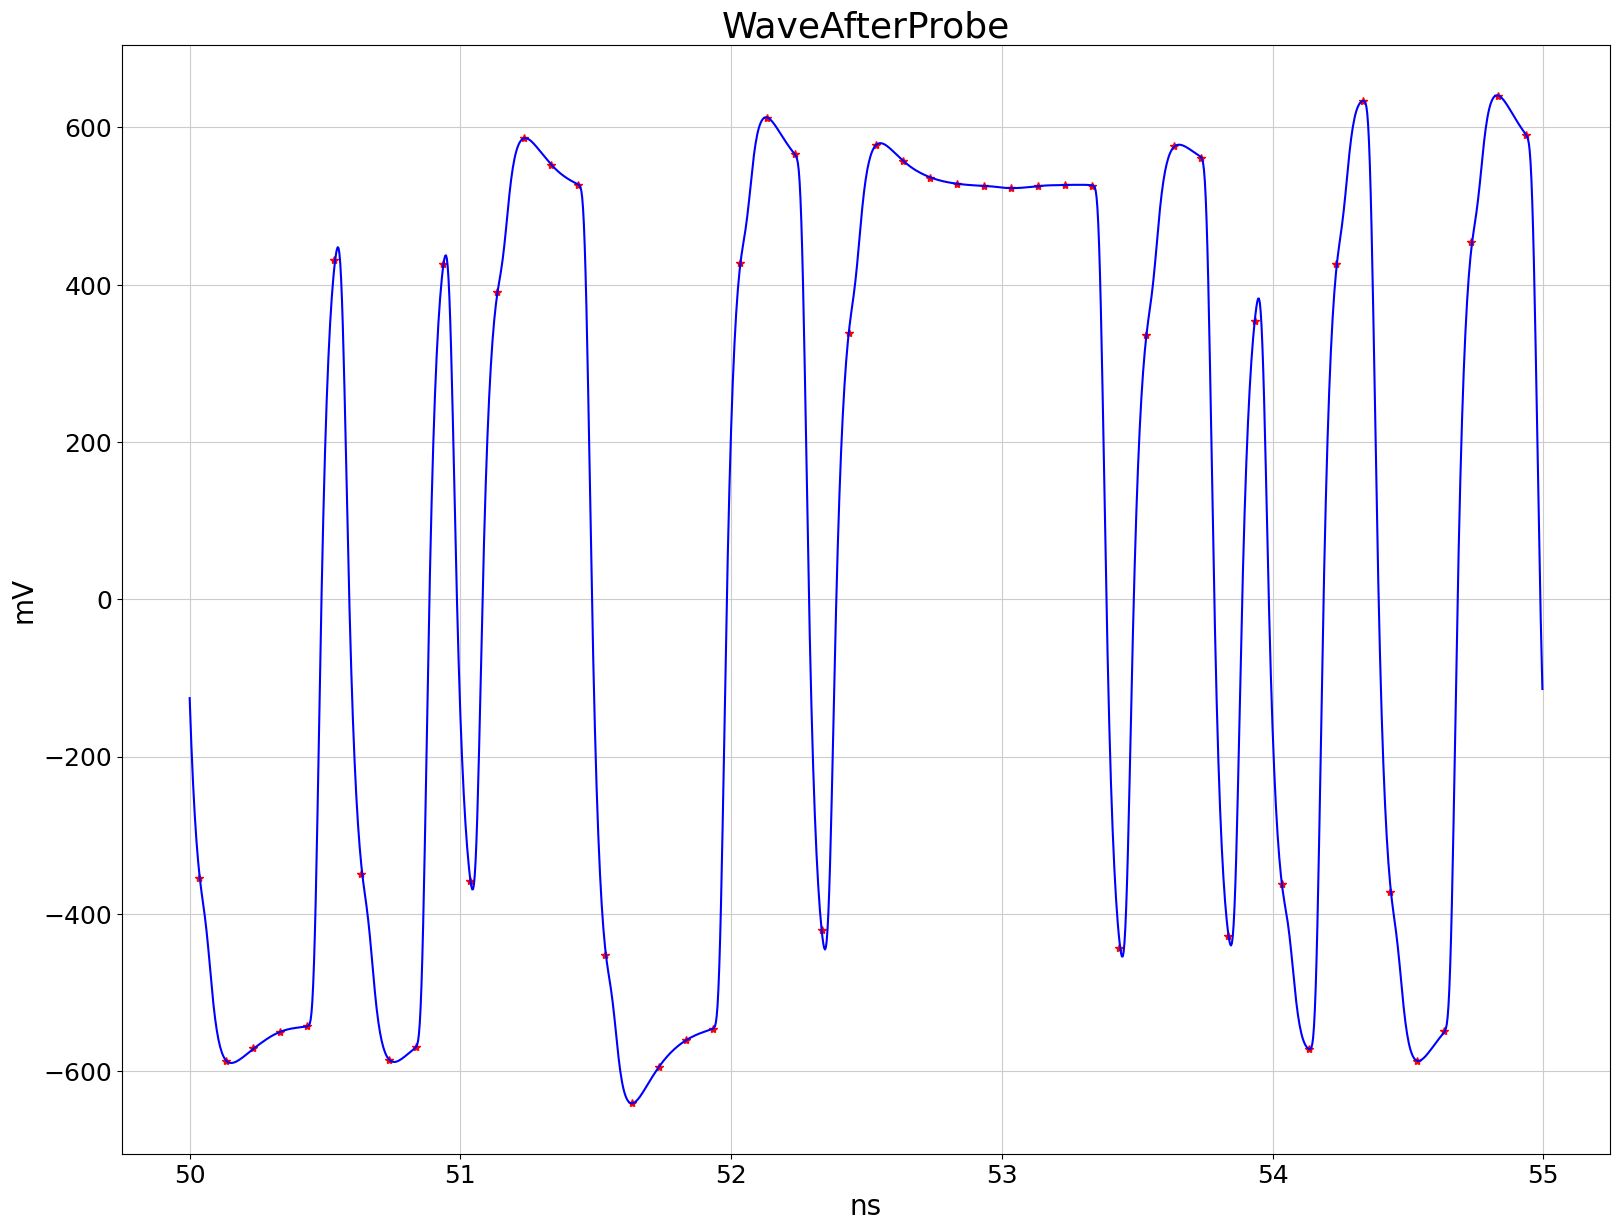

In [10]:
tstop = 55e-9
tstart = 50e-9
scale_time = ansys.aedt.core.constants.unit_converter(
    1,
    unit_system="Time",
    input_units="s",
    output_units=original_data.units_sweeps["Time"],
)
scale_data = ansys.aedt.core.constants.unit_converter(
    1,
    unit_system="Voltage",
    input_units="V",
    output_units=original_data.units_data[plot_name],
)

tstop_ns = scale_time * tstop
tstart_ns = scale_time * tstart

orig_times = np.array([row[0] for row in original_data_value[plot_name]])
start_index_original_data = int(np.searchsorted(orig_times, tstart_ns, side="left"))
if start_index_original_data >= orig_times.size:
    start_index_original_data = orig_times.size - 1
stop_index_original_data = int(np.searchsorted(orig_times, tstop_ns, side="left"))
if stop_index_original_data >= orig_times.size:
    stop_index_original_data = orig_times.size - 1

sample_index_array = np.array(sample_waveform[0].index)
start_index_waveform = int(np.searchsorted(sample_index_array, tstart, side="left"))
if start_index_waveform >= sample_index_array.size:
    start_index_waveform = sample_index_array.size - 1
stop_index_waveform = int(np.searchsorted(sample_index_array, tstop, side="left"))
if stop_index_waveform >= sample_index_array.size:
    stop_index_waveform = sample_index_array.size - 1

original_data_zoom = original_data_value[plot_name][
    start_index_original_data:stop_index_original_data
]
sampled_data_zoom = (
    sample_waveform[0].values[start_index_waveform:stop_index_waveform] * scale_data
)
sampled_time_zoom = (
    sample_waveform[0].index[start_index_waveform:stop_index_waveform] * scale_time
)

fig, ax = plt.subplots()
ax.plot(sampled_time_zoom, sampled_data_zoom, "r*")
ax.plot(
    np.array(list(original_data_zoom[:,0])),
    original_data_zoom[:,1],
    color="blue",
)
ax.set_title("WaveAfterProbe")
ax.set_xlabel(original_data.units_sweeps["Time"])
ax.set_ylabel(original_data.units_data[plot_name])
plt.show()

## Plot slicer scatter

Create the plot from a start time to stop time in seconds.

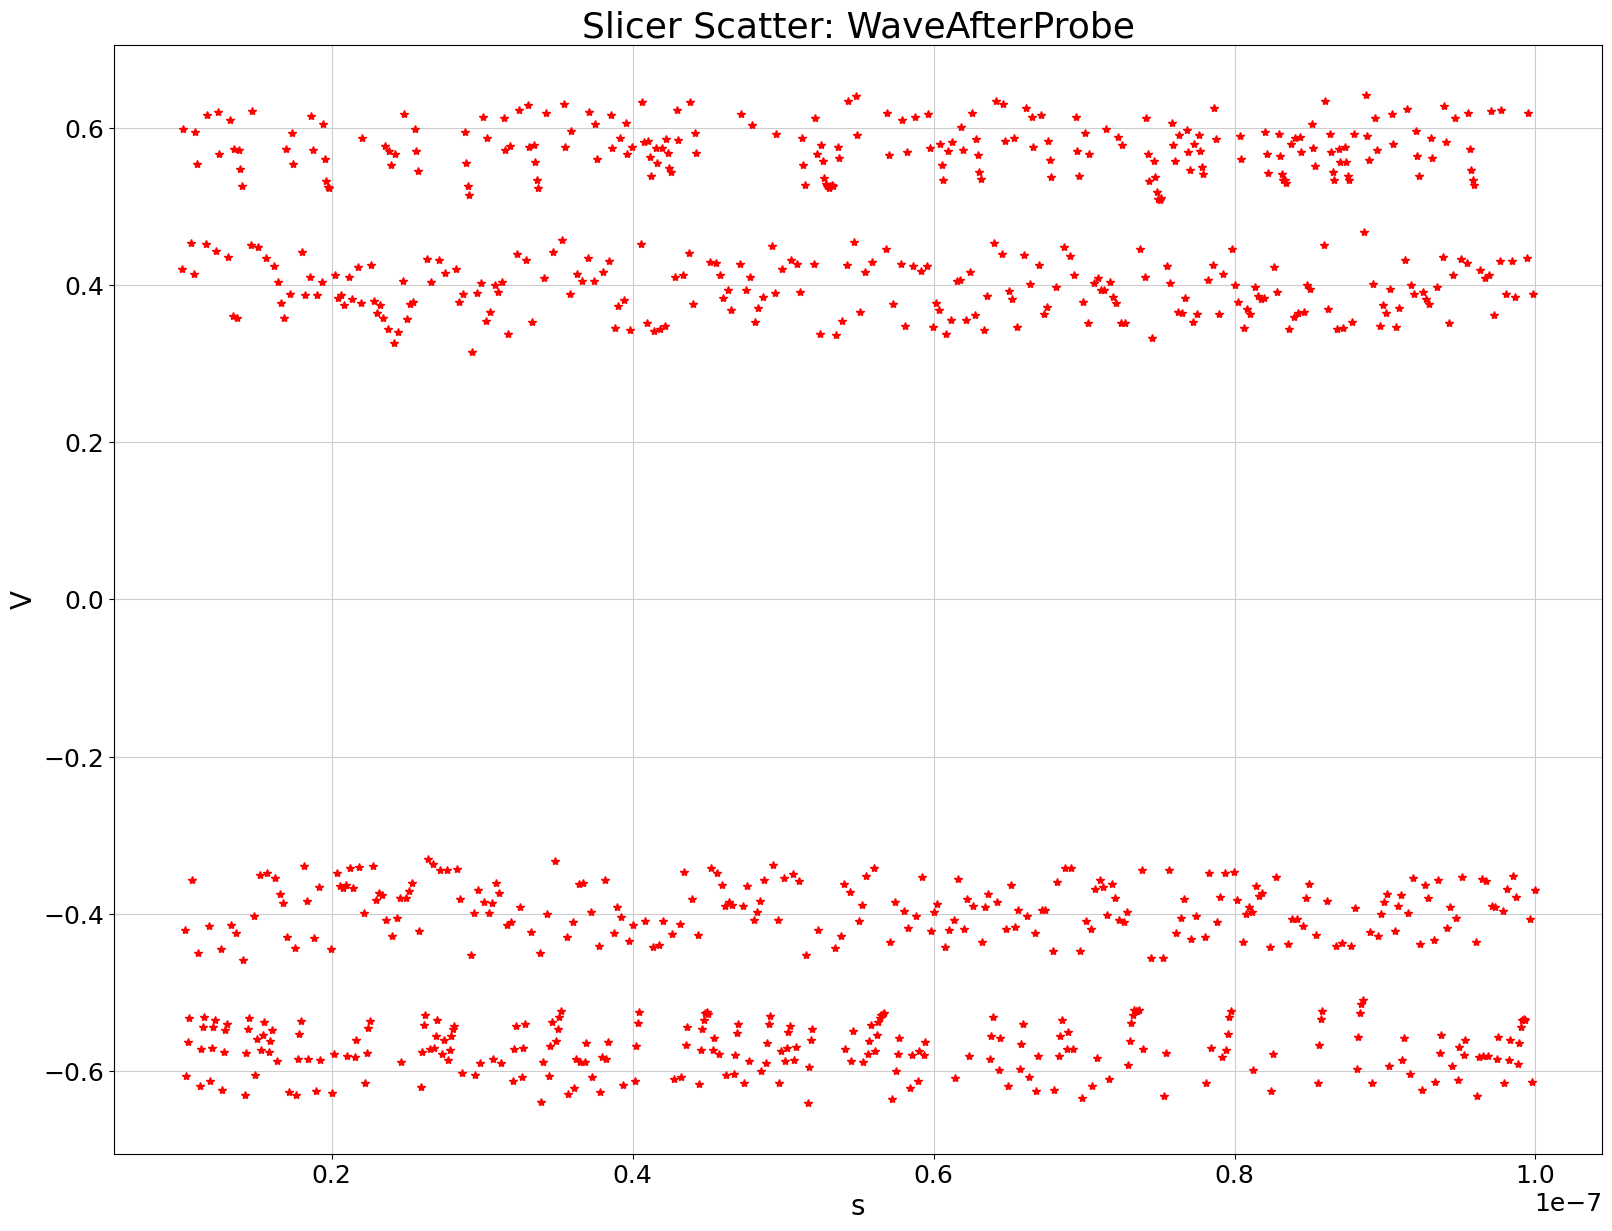

In [11]:
fig, ax2 = plt.subplots()
ax2.plot(sample_waveform[0].index, np.concatenate(sample_waveform[0].values), "r*")
ax2.set_title("Slicer Scatter: WaveAfterProbe")
ax2.set_xlabel("s")
ax2.set_ylabel("V")
plt.show()

## Plot scatter histogram

Create the plot from a start time to stop time in seconds.

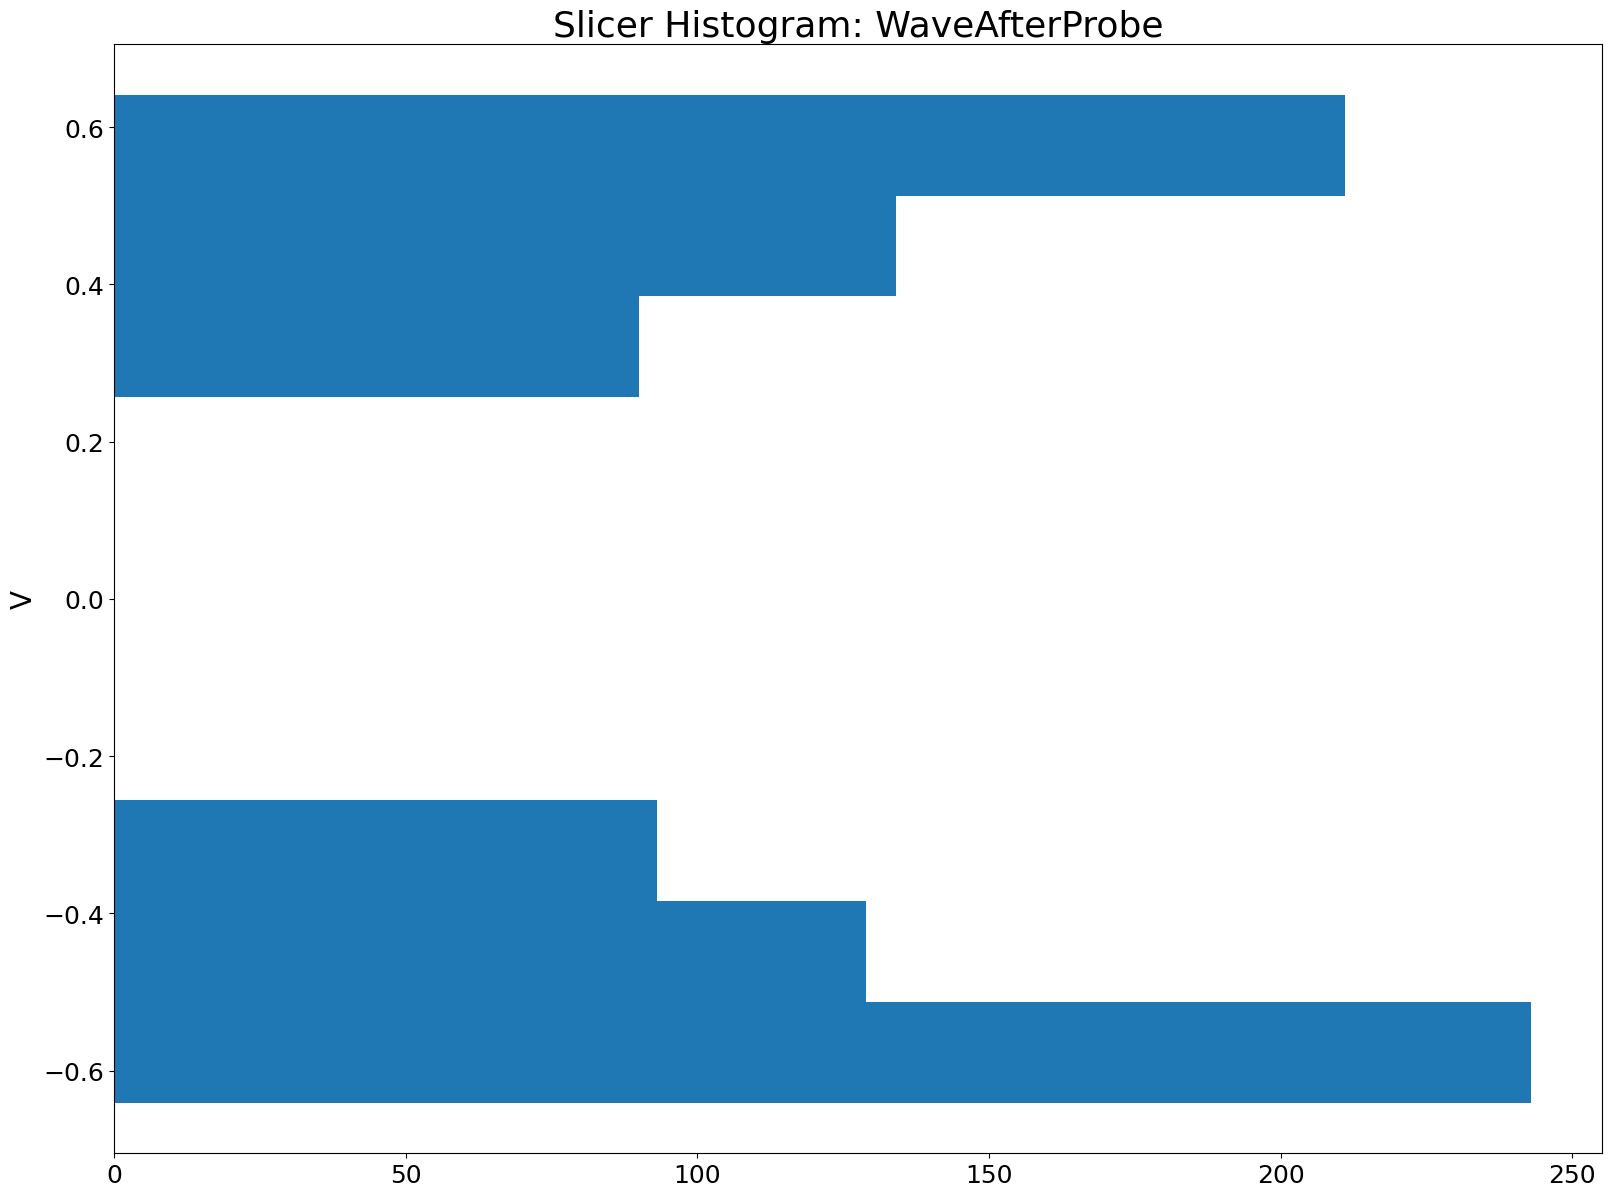

In [12]:
fig, ax4 = plt.subplots()
ax4.set_title("Slicer Histogram: WaveAfterProbe")
ax4.hist(np.concatenate(sample_waveform[0].values), orientation="horizontal")
ax4.set_ylabel("V")
ax4.grid()
plt.show()

## Get transient report data

In [13]:
plot_name = "V(b_input_43.int_ami_rx.eye_probe.out)"
circuit.solution_type = "NexximTransient"
context = {"time_start": "0ps","time_stop": "100ns"}
original_data = circuit.post.get_solution_data(
    expressions=plot_name,
    setup_sweep_name="NexximTransient",
    domain="Time",
    variations=circuit.available_variations.nominal,
    context=context
)

PyAEDT INFO: Solution Data Correctly Loaded.


Time to initialize solution data:0.01587677001953125
Time to initialize solution data:0.0475773811340332


## Extract sample waveform

Extract a waveform at a specific clock time plus a half unit interval.

In [14]:
original_data.enable_pandas_output = False
original_data_value = original_data.get_expression_data(formula="real")[1]
original_data_sweep = original_data.primary_sweep_values
waveform_unit = original_data.units_data[plot_name]

waveform_sweep_unit = original_data.units_sweeps["Time"]
tics = np.arange(20e-9, 100e-9, 1e-10, dtype=float)

sample_waveform = circuit.post.sample_waveform(
    waveform_data=original_data_value,
    waveform_sweep=original_data_sweep,
    waveform_unit=waveform_unit,
    waveform_sweep_unit=waveform_sweep_unit,
    unit_interval=unit_interval,
    clock_tics=tics,
    pandas_enabled=False,
)

## Plot waveform

Create the plot from a start time to stop time in seconds.

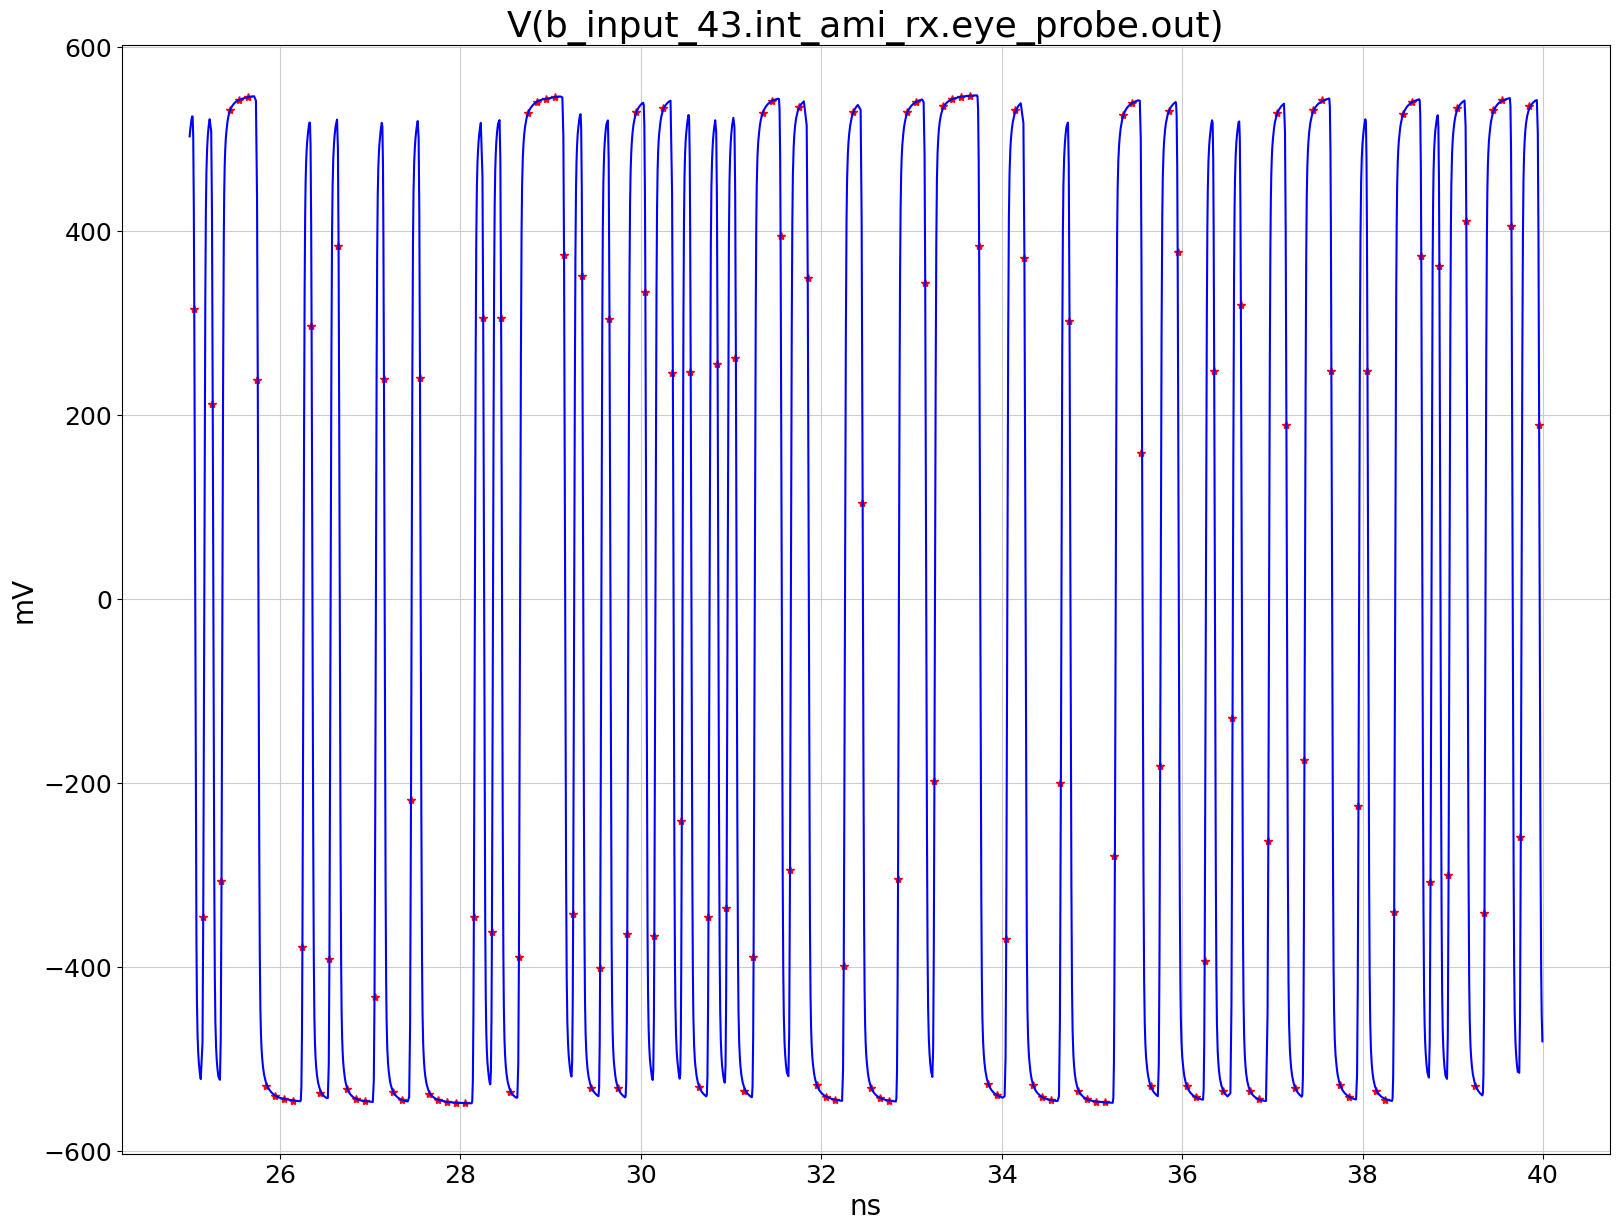

In [15]:
tstop = 40.0e-9
tstart = 25.0e-9
scale_time = ansys.aedt.core.constants.unit_converter(
    1, unit_system="Time", input_units="s", output_units=waveform_sweep_unit
)
scale_data = ansys.aedt.core.constants.unit_converter(
    1, unit_system="Voltage", input_units="V", output_units=waveform_unit
)

tstop_ns = scale_time * tstop
tstart_ns = scale_time * tstart

start_index_original_data = int(np.searchsorted(original_data_sweep, tstart_ns, side="left"))
if start_index_original_data >= original_data_sweep.size:
    start_index_original_data = original_data_sweep.size - 1

stop_index_original_data = int(np.searchsorted(original_data_sweep, tstop_ns, side="left"))
if stop_index_original_data >= original_data_sweep.size:
    stop_index_original_data = original_data_sweep.size - 1

cont = 0
for frame in sample_waveform:
    if tstart <= frame[0]:
        start_index_waveform = cont
        break
    cont += 1
for frame in sample_waveform[start_index_waveform:]:
    if frame[0] >= tstop:
        stop_index_waveform = cont
        break
    cont += 1

original_data_zoom = original_data_value[
    start_index_original_data:stop_index_original_data
]
original_sweep_zoom = original_data_sweep[
    start_index_original_data:stop_index_original_data
]
original_data_zoom_array = np.array(
    list(map(list, zip(original_sweep_zoom, original_data_zoom)))
)
original_data_zoom_array[:, 0] *= 1
sampled_slice = sample_waveform[start_index_waveform:stop_index_waveform]
# Build a homogeneous Nx2 array [time, value] from the sliced frames, with a guard for empty slices.
if len(sampled_slice):
    sampled_data_zoom_array = np.array(
        [
            [
                float(np.asarray(frame[0]).ravel()[0]),
                float(np.asarray(frame[1]).ravel()[0]),
            ]
            for frame in sampled_slice
        ],
        dtype=float,
    )
    sampled_data_zoom_array[:, 0] *= scale_time
    sampled_data_zoom_array[:, 1] *= scale_data
else:
    sampled_data_zoom_array = np.empty((0, 2))

fig, ax = plt.subplots()
ax.plot(sampled_data_zoom_array[:, 0], sampled_data_zoom_array[:, 1], "r*")
ax.plot(original_sweep_zoom, original_data_zoom_array[:, 1], color="blue")
ax.set_title(plot_name)
ax.set_xlabel(waveform_sweep_unit)
ax.set_ylabel(waveform_unit)
plt.show()

## Plot slicer scatter

Create the plot from a start time to stop time in seconds.

In [16]:
sample_waveform_array = np.array(
        [
            [float(frame[0]), float(np.asarray(frame[1]).ravel()[0])]
            for frame in sample_waveform
        ],
        dtype=float,
)

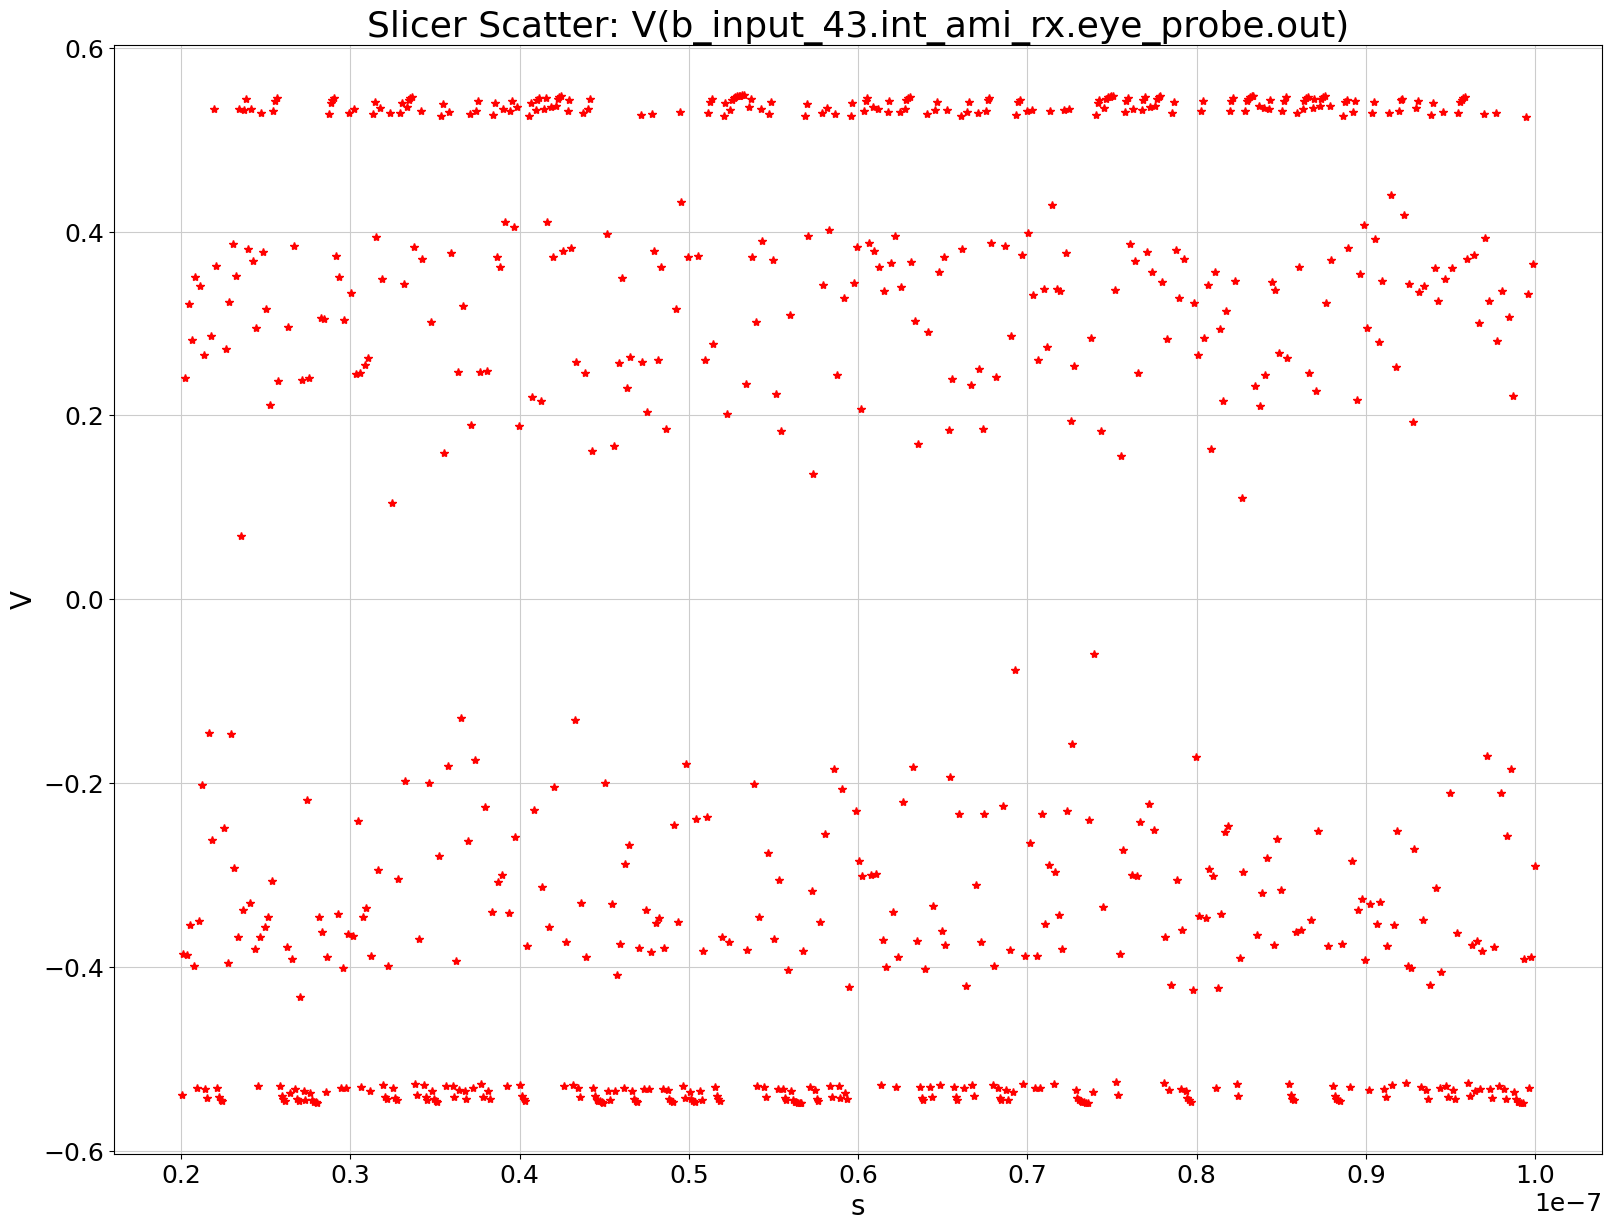

In [17]:
fig, ax2 = plt.subplots()
ax2.plot(sample_waveform_array[:, 0], sample_waveform_array[:, 1], "r*")
ax2.set_title("Slicer Scatter: " + plot_name)
ax2.set_xlabel("s")
ax2.set_ylabel("V")
plt.show()

## Release AEDT

Release AEDT and close the example.

In [18]:
circuit.save_project()
circuit.release_desktop()
# Wait 3 seconds to allow AEDT to shut down before cleaning the temporary directory.
time.sleep(3)

PyAEDT INFO: Project ami_usb Saved correctly


PyAEDT INFO: Desktop has been released and closed.


## Clean up

All project files are saved in the folder ``temp_folder.name``. If you've run this example as a Jupyter notebook, you
can retrieve those project files. The following cell removes all temporary files, including the project folder.

In [19]:
temp_folder.cleanup()